In [15]:
# load data.csv into pandas

import pandas as pd

data = pd.read_csv('data.csv', delimiter=';')
# convert target to numeric
# Dropout -> 0, Enrolled -> 1, Graduate -> 2
data['Target'] = data['Target'].map({'Dropout': 0, 'Enrolled': 1, 'Graduate': 2})

X = data.drop('Target', axis=1)
y = data['Target']

print(X.head())
print(y.shape)

   Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                         

In [16]:
# perform Recursive Feature Elimination

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# create the RFE model and select some attributes
model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=10)
fit = rfe.fit(X, y)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)
print(X.columns[fit.support_])


Num Features: 10
Selected Features: [False False False  True False False  True False False False False  True
  True False False False False False False  True False False False False
  True  True False False False  True  True  True False False False False]
Feature Ranking: [23 10 13  1 24 19  1 25  9  8  5  1  1 18 27 15  3 16 14  1 26 17 12  2
  1  1 22 20  6  1  1  1 21  7 11  4]
Index(['Course', 'Previous qualification (grade)', 'Father's occupation',
       'Admission grade', 'Age at enrollment',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)'],
      dtype='object')


In [17]:
# evaluate model with all features
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

# evaluate model with only selected features
X_train_selected = X_train[X.columns[fit.support_]]
X_test_selected = X_test[X.columns[fit.support_]]

model = RandomForestClassifier()
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)
print(accuracy_score(y_test, y_pred))

0.7593220338983051
0.7322033898305085


In [19]:
# grid search how many features to select

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_features_to_select': range(1, 20)
}

rfe = RFE(RandomForestClassifier())
grid = GridSearchCV(estimator=rfe, param_grid=param_grid, cv=3, n_jobs=-1)
grid_result = grid.fit(X, y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.767180 using {'n_features_to_select': 15}


In [22]:
# loop through the # of features to select and plot the accuracy

import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

# first calculate the accuracy for all features
model = RandomForestClassifier()
scores = cross_val_score(model, X, y, cv=5)
print("Num Features: %d, Accuracy: %f" % (X.shape[1], scores.mean()))

for n in range(1, X.shape[1]):
    rfe = RFE(RandomForestClassifier(), n_features_to_select=n)
    rfe.fit(X, y)
    X_selected = X[X.columns[rfe.support_]]

    model = RandomForestClassifier()
    scores = cross_val_score(model, X_selected, y, cv=5)
    print("Num Features: %d, Accuracy: %f" % (n, scores.mean()))



Num Features: 36, Accuracy: 0.776669
Num Features: 1, Accuracy: 0.648736
Num Features: 2, Accuracy: 0.606916
Num Features: 3, Accuracy: 0.671785
Num Features: 4, Accuracy: 0.678115
Num Features: 5, Accuracy: 0.689192
Num Features: 6, Accuracy: 0.703883
Num Features: 7, Accuracy: 0.715638
Num Features: 8, Accuracy: 0.735302
Num Features: 9, Accuracy: 0.733042
Num Features: 10, Accuracy: 0.733042
Num Features: 11, Accuracy: 0.734176
Num Features: 12, Accuracy: 0.758360
Num Features: 13, Accuracy: 0.763335
Num Features: 14, Accuracy: 0.761750
Num Features: 15, Accuracy: 0.767176
Num Features: 16, Accuracy: 0.770114
Num Features: 17, Accuracy: 0.771471
Num Features: 18, Accuracy: 0.766046
Num Features: 19, Accuracy: 0.770115
Num Features: 20, Accuracy: 0.773277
Num Features: 21, Accuracy: 0.770566
Num Features: 22, Accuracy: 0.776216
Num Features: 23, Accuracy: 0.772825
Num Features: 24, Accuracy: 0.777800
Num Features: 25, Accuracy: 0.776898
Num Features: 26, Accuracy: 0.774862
Num Featur

[0.02000403 0.04412745 0.0197233  0.05805828 0.         0.01757578
 0.03789393 0.         0.02713084 0.0071344  0.04586199 0.01952385
 0.02941417 0.01000762 0.00863923 0.03699289 0.09553875 0.02583628
 0.05522035 0.06019808 0.01707628 0.         0.04921965 0.0806199
 0.24413513 0.18338292 0.00507928 0.00371432 0.05155638 0.0932591
 0.31859883 0.23172881 0.         0.         0.0058484  0.        ]


c:\Users\james\anaconda3\envs\dm\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


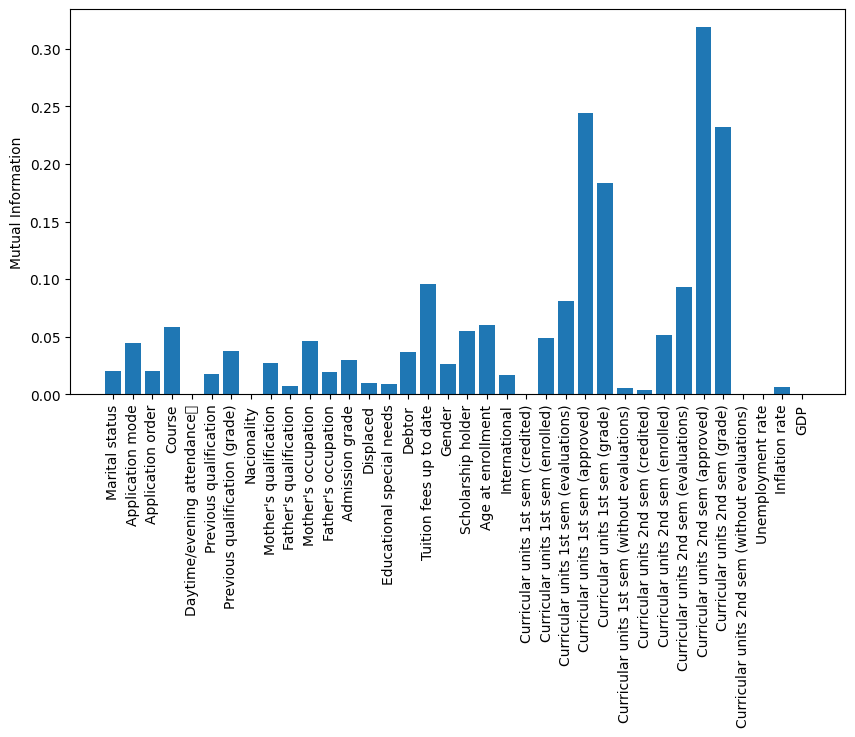

Curricular units 2nd sem (approved)    0.318599
Curricular units 1st sem (approved)    0.244135
Curricular units 2nd sem (grade)       0.231729
dtype: float64


In [18]:
# feature selection using Mutual Information

from sklearn.feature_selection import mutual_info_classif

# determine the mutual information
mutual_info = mutual_info_classif(X, y, random_state=0)
print(mutual_info)

# plot the mutual information
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(X.columns, mutual_info)
plt.ylabel('Mutual Information')
plt.xticks(rotation=90)
plt.show()

# select the top 3 features
top3 = pd.Series(mutual_info, index=X.columns).nlargest(3)
print(top3)

